In [1]:
#라이브러리 import
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold


import matplotlib.pyplot as plt
import joblib

In [2]:
#csv파일 로드 with pandas
train_df = pd.read_csv('./dataset/train.csv')
test_df = pd.read_csv('./dataset/test.csv')

In [3]:
#기간별 일평균 대기환경 정보 로드
air_quality_2018 = pd.read_csv('../dataset/daily_average_air_environment_2018.csv')
air_quality_2019 = pd.read_csv('../dataset/daily_average_air_environment_2019.csv')
air_quality_2020 = pd.read_csv('../dataset/daily_average_air_environment_2020.csv')

air_quality_2018.describe()

,date_time,PM10,PM2.5
count,9.100000e+01,91.000000,91.000000
mean,2.018052e+07,43.756484,24.075604
std,8.212322e+01,23.290336,12.618958
min,2.018040e+07,6.520000,3.560000
25%,2.018042e+07,28.380000,15.160000
50%,2.018052e+07,40.960000,23.600000
75%,2.018061e+07,58.620000,31.840000
max,2.018063e+07,120.600000,56.760000


In [4]:
#2018년 ~ 2020년 merge
air_quality = pd.concat([air_quality_2018, air_quality_2019, air_quality_2020], ignore_index=True)

air_quality = air_quality.drop(['date_time'],axis=1)

air_quality

,PM10,PM2.5
0,72.48,35.32
1,71.48,28.32
2,69.12,21.04
3,13.00,6.92
4,6.52,4.08
...,...,...
268,21.68,13.96
269,25.24,16.08
270,29.00,19.20
271,35.04,24.60


In [5]:
#년, 월, 일을 각 feature로 분리하기 위한 작업
train_df['year'] = train_df['date_time'].str[:4].astype(float) - 2017
train_df['month']= train_df['date_time'].str[5:7].astype(float) - 3
train_df['day']= train_df['date_time'].str[8:].astype(float)

train_df

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals,year,month,day
0,2018-04-01,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994,1.0,1.0,1.0
1,2018-04-02,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139,1.0,1.0,2.0
2,2018-04-03,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817,1.0,1.0,3.0
3,2018-04-04,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034,1.0,1.0,4.0
4,2018-04-05,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833,1.0,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,2020-06-26,228.662,3.980,0.223,2.271,78.378,20.500,27.526,36.486,96150,3.0,3.0,26.0
269,2020-06-27,207.770,2.865,0.081,1.794,78.412,20.812,28.842,21.081,107001,3.0,3.0,27.0
270,2020-06-28,282.568,1.730,0.000,1.820,72.736,21.000,29.053,7.297,98568,3.0,3.0,28.0
271,2020-06-29,137.027,2.257,0.088,2.043,70.473,19.625,26.000,15.541,70053,3.0,3.0,29.0


In [6]:
#기존 데이터 + 미세먼지 정보
train_df = pd.concat([train_df, air_quality],axis=1)

train_df

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals,year,month,day,PM10,PM2.5
0,2018-04-01,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994,1.0,1.0,1.0,72.48,35.32
1,2018-04-02,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139,1.0,1.0,2.0,71.48,28.32
2,2018-04-03,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817,1.0,1.0,3.0,69.12,21.04
3,2018-04-04,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034,1.0,1.0,4.0,13.00,6.92
4,2018-04-05,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833,1.0,1.0,5.0,6.52,4.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,2020-06-26,228.662,3.980,0.223,2.271,78.378,20.500,27.526,36.486,96150,3.0,3.0,26.0,21.68,13.96
269,2020-06-27,207.770,2.865,0.081,1.794,78.412,20.812,28.842,21.081,107001,3.0,3.0,27.0,25.24,16.08
270,2020-06-28,282.568,1.730,0.000,1.820,72.736,21.000,29.053,7.297,98568,3.0,3.0,28.0,29.00,19.20
271,2020-06-29,137.027,2.257,0.088,2.043,70.473,19.625,26.000,15.541,70053,3.0,3.0,29.0,35.04,24.60


In [7]:
#요일 추출
import datetime

#월:1 ~ 일:7
train_df['weekday'] = pd.to_datetime(train_df['date_time']).dt.weekday + 1

train_df.head()

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals,year,month,day,PM10,PM2.5,weekday
0,2018-04-01,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994,1.0,1.0,1.0,72.48,35.32,7
1,2018-04-02,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139,1.0,1.0,2.0,71.48,28.32,1
2,2018-04-03,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817,1.0,1.0,3.0,69.12,21.04,2
3,2018-04-04,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034,1.0,1.0,4.0,13.00,6.92,3
4,2018-04-05,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833,1.0,1.0,5.0,6.52,4.08,4


In [8]:
#일교차 추가
train_df['temp_gap'] = train_df['high_temp'] - train_df['low_temp']

In [9]:
train_df.describe()

,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals,year,month,day,PM10,PM2.5,weekday,temp_gap
count,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000
mean,202.750967,2.288256,0.100963,2.480963,56.745491,13.795249,23.384733,16.878103,59574.978022,2.000000,2.000000,15.670330,41.008059,22.477216,4.000000,9.589484
std,56.659232,0.961775,0.203193,0.884397,12.351268,5.107711,5.204605,16.643772,27659.575774,0.817996,0.813489,8.774195,19.985423,10.994206,2.003673,2.057910
min,57.047000,1.000000,0.000000,0.753000,24.831000,1.938000,9.895000,0.000000,1037.000000,1.000000,1.000000,1.000000,6.520000,3.080000,1.000000,3.417000
25%,171.541000,1.405000,0.000000,1.820000,47.196000,9.938000,19.842000,4.054000,36761.000000,1.000000,1.000000,8.000000,28.240000,14.880000,2.000000,8.346000
50%,209.774000,2.167000,0.000000,2.411000,55.845000,14.375000,24.158000,12.162000,63032.000000,2.000000,2.000000,16.000000,38.920000,22.040000,4.000000,9.675000
75%,238.412000,3.000000,0.088000,2.924000,66.419000,18.000000,27.526000,22.973000,81515.000000,3.000000,3.000000,23.000000,50.360000,27.760000,6.000000,11.039000
max,321.622000,4.000000,1.000000,5.607000,88.885000,22.312000,33.421000,82.162000,110377.000000,3.000000,3.000000,31.000000,120.600000,58.320000,7.000000,13.754000


<h2>Linear Regression</h2>

In [150]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [10]:
def NMAE(true, pred):
    score = np.mean(np.abs(true-pred) / true)
    return score

In [110]:
# Y_hat = model.predict(X_train)
# NMAE(y_test,Y_hat)

In [111]:
#true, pred비교
for i, v in enumerate(Y_hat):
    print(f"{i}번째 true: {Y[i]}  pred: {v}")

0번째 true: 22994  pred: 71903.76143891882
1번째 true: 28139  pred: 20848.13655409913
2번째 true: 26817  pred: 65348.06951997814
3번째 true: 26034  pred: 58690.528869811445
4번째 true: 2833  pred: 57546.590986259536
5번째 true: 13297  pred: 43376.36693643691
6번째 true: 13088  pred: 73092.83175156254
7번째 true: 7758  pred: 54270.13594592601
8번째 true: 23925  pred: 81242.56575886233
9번째 true: 20423  pred: -632.4574785747245
10번째 true: 25557  pred: 43411.88936632605
11번째 true: 28885  pred: 38595.49474509553
12번째 true: 29497  pred: 48096.01462220822
13번째 true: 8216  pred: -8420.043361164837
14번째 true: 12721  pred: 76952.20670588907
15번째 true: 29589  pred: 49232.37832959484
16번째 true: 28236  pred: 85413.52693427357
17번째 true: 23499  pred: 17723.383304454248
18번째 true: 20400  pred: 63148.236788337
19번째 true: 28351  pred: 64036.0375122037
20번째 true: 33144  pred: 67740.13241389047
21번째 true: 8095  pred: 42220.64962207081
22번째 true: 1037  pred: 54438.96382493228
23번째 true: 24560  pred: 57933.65254393953
24번째 

In [10]:
#test_df 일자 작업
test_df['year'] = test_df['date_time'].str[:4].astype(float)
test_df['month']= test_df['date_time'].str[5:7].astype(float)
test_df['day']= test_df['date_time'].str[8:].astype(float)

#월:1 ~ 일:7
test_df['weekday'] = pd.to_datetime(test_df['date_time']).dt.weekday + 1

test_df.head()

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,year,month,day,weekday
0,2021-04-01,108.833,3.000,0.000,2.900,28.333,11.800,20.667,18.333,2021.0,4.0,1.0,4
1,2021-04-02,116.717,3.850,0.000,2.662,46.417,12.000,19.000,28.500,2021.0,4.0,2.0,5
2,2021-04-03,82.669,4.000,0.565,2.165,77.258,8.875,16.368,52.847,2021.0,4.0,3.0,6
3,2021-04-04,44.123,3.466,0.466,3.747,63.288,6.250,17.368,37.671,2021.0,4.0,4.0,7
4,2021-04-05,147.791,1.500,0.000,1.560,48.176,7.188,18.684,4.459,2021.0,4.0,5.0,1


In [124]:
X_test = test_df.drop(['date_time','wind_direction'], axis=1)
Y_test_hat = model.predict(X_test)

In [125]:
for i, v in enumerate(Y_test_hat):
    print(f"{i}번째 pred: {v}")

0번째 pred: 92711.43429597467
1번째 pred: 91354.5589916408
2번째 pred: 72386.65419001877
3번째 pred: 74332.41859320551
4번째 pred: 105968.49736724794
5번째 pred: 104555.57802577317
6번째 pred: 107374.60800632834
7번째 pred: 103235.58729555458
8번째 pred: 108798.49377697706
9번째 pred: 105021.56739401072
10번째 pred: 102546.94964082539
11번째 pred: 73226.31735935807
12번째 pred: 80247.66626749188
13번째 pred: 101557.07575959712
14번째 pred: 104359.44981894642
15번째 pred: 79945.09967019409
16번째 pred: 76452.28121341765
17번째 pred: 105118.66957341135
18번째 pred: 111095.88355981559
19번째 pred: 115445.93779399246
20번째 pred: 112328.31726492941
21번째 pred: 103874.14167048782
22번째 pred: 98668.75559627265
23번째 pred: 105219.11013621837
24번째 pred: 108820.49638938159
25번째 pred: 103839.91892401129
26번째 pred: 101136.86296644062
27번째 pred: 93960.58632022142
28번째 pred: 100884.8498043418
29번째 pred: 83112.21744572371
30번째 pred: 61385.49265559018
31번째 pred: 105517.73242401332
32번째 pred: 109737.78635387123
33번째 pred: 80629.15652385354
34번째 

In [116]:
y_test

154    82911
56     39534
66     40440
136    75399
55     37761
       ...  
218    90645
143    78504
96     25902
161    63032
184    74856
Name: number_of_rentals, Length: 82, dtype: int64

In [369]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=5) 

<h2>XGboost</h2>

In [11]:
X = train_df.drop(['date_time','number_of_rentals','wind_direction'],axis=1)
Y = train_df['number_of_rentals']

In [12]:
X.head()

,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,year,month,day,PM10,PM2.5,weekday,temp_gap
0,4.000,0.000,3.050,75.000,12.600,21.000,30.000,1.0,1.0,1.0,72.48,35.32,7,8.400
1,2.950,0.000,3.278,69.833,12.812,19.000,19.500,1.0,1.0,2.0,71.48,28.32,1,6.188
2,2.911,0.000,2.690,74.879,10.312,15.316,19.113,1.0,1.0,3.0,69.12,21.04,2,5.004
3,3.692,0.425,3.138,71.849,8.312,12.368,43.493,1.0,1.0,4.0,13.00,6.92,3,4.056
4,4.000,0.723,3.186,73.784,5.875,10.421,63.378,1.0,1.0,5.0,6.52,4.08,4,4.546


In [13]:
#K-Fold 교차검증
kfold = KFold(n_splits=4, shuffle=True, random_state=97)

for train_idx, test_idx in kfold.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = Y.iloc[train_idx], Y.iloc[test_idx]

In [14]:
from xgboost import XGBRegressor

In [15]:
XGB_model = XGBRegressor()

In [16]:
XGB_model.fit(X_train,
              y_train,
              verbose=True,
              early_stopping_rounds=10,
              eval_metric='rmse',
              eval_set=[(X_test, y_test)]
)

[0]	validation_0-rmse:48826.90625
[1]	validation_0-rmse:36640.23047
[2]	validation_0-rmse:27652.55664
[3]	validation_0-rmse:21271.80469
[4]	validation_0-rmse:17153.80078
[5]	validation_0-rmse:14611.14062
[6]	validation_0-rmse:12471.40430
[7]	validation_0-rmse:11299.42578
[8]	validation_0-rmse:10512.31152
[9]	validation_0-rmse:9989.37402
[10]	validation_0-rmse:9610.96680
[11]	validation_0-rmse:9341.98340
[12]	validation_0-rmse:9165.60352
[13]	validation_0-rmse:9045.25293
[14]	validation_0-rmse:8961.16113
[15]	validation_0-rmse:8859.67773
[16]	validation_0-rmse:8804.90332
[17]	validation_0-rmse:8766.97852
[18]	validation_0-rmse:8747.09180
[19]	validation_0-rmse:8696.53223
[20]	validation_0-rmse:8686.61426
[21]	validation_0-rmse:8686.42481
[22]	validation_0-rmse:8688.10449
[23]	validation_0-rmse:8671.86133
[24]	validation_0-rmse:8668.00586
[25]	validation_0-rmse:8663.43945
[26]	validation_0-rmse:8670.95019
[27]	validation_0-rmse:8671.23926
[28]	validation_0-rmse:8674.13867
[29]	validation

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [17]:
y_pred = XGB_model.predict(X_test)

In [18]:
#xgb모델의 NMAE score계산
NMAE(y_test,y_pred)

0.20507657488603917

In [22]:
score = XGB_model.score(X_test,y_test)
print('정확도: {score:.3f}'.format(score=score))

정확도: 0.912


In [19]:
#모델 저장
filename='../models/model.pkl'
joblib.dump(XGB_model, filename)

['./models/model.pkl']

In [173]:
#user의 input을 가정한 dictionary생성 후 dataframe생성
data = {"sky_condition":3.800, "precipitation_form":0.000, "wind_speed":3.276,"humidity":15.000,"low_temp":12.812, "high_temp":21.000, "Precipitation_Probability":10.000,"year":2021.0,"month":6.0, "day":1.0}

_input = pd.DataFrame(data,index=np.arange(1))

_input

,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,year,month,day
0,3.8,0.0,3.276,15.0,12.812,21.0,10.0,2021.0,6.0,1.0


In [66]:
predictions = [round(value) for value in y_pred]
predictions

[74723,
 37953,
 42569,
 75676,
 40244,
 80052,
 69445,
 64159,
 77303,
 35233,
 18662,
 34316,
 102103,
 101705,
 95400,
 58976,
 20302,
 101162,
 37354,
 77197,
 75126,
 34811,
 39210,
 75589,
 29864,
 80293,
 50757,
 50055,
 62261,
 59503,
 82534,
 18690,
 34270,
 78571,
 70139,
 72111,
 45463,
 39097,
 37435,
 43285,
 90147,
 51572,
 90984,
 100947,
 54169,
 78835,
 13024,
 53961,
 16907,
 56143,
 37753,
 23080,
 81057,
 73483,
 90003,
 48736,
 64803,
 93227,
 94183,
 63826,
 78893,
 74345,
 41320,
 97519,
 34983,
 63030,
 30146,
 93226,
 28763]

In [157]:
from sklearn.metrics import accuracy_score
accuary = accuracy_score(y_test, predictions)
accuary

0.0

In [24]:
#user의 input의 결과값을 예측했을 때
XGB_model.predict(_input)

ValueError: feature_names mismatch: ['sky_condition', 'precipitation_form', 'wind_speed', 'humidity', 'low_temp', 'high_temp', 'Precipitation_Probability', 'year', 'month', 'day', 'weekday'] ['sky_condition', 'precipitation_form', 'wind_speed', 'humidity', 'low_temp', 'high_temp', 'Precipitation_Probability', 'year', 'month', 'day']
expected weekday in input data

In [159]:
#true, pred비교
for i, v in enumerate(y_pred):
    print(f"{i}번째 true: {y_test[i]}  pred: {v}")

KeyError: 0

<h1>상관관계</h1>


In [67]:
X.corr()

,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,year,month,day,PM10,PM2.5,weekday,temp_gap
sky_condition,1.000000,0.673814,0.140816,0.651321,0.088365,-0.151566,0.912601,-1.137155e-01,6.051376e-02,6.939584e-02,-0.315754,-0.230871,1.108140e-01,-0.602642
precipitation_form,0.673814,1.000000,0.287325,0.610185,0.045704,-0.143994,0.910609,-3.873091e-02,3.912342e-02,6.067542e-02,-0.306414,-0.252257,2.788516e-02,-0.477610
wind_speed,0.140816,0.287325,1.000000,0.036239,-0.399858,-0.443547,0.241207,-1.767765e-01,-2.497985e-01,-1.288720e-01,-0.034346,-0.304589,-8.464599e-02,-0.129320
humidity,0.651321,0.610185,0.036239,1.000000,0.414155,0.190136,0.685743,-2.446968e-02,3.552106e-01,2.114200e-01,-0.275070,-0.109398,3.738686e-02,-0.547062
low_temp,0.088365,0.045704,-0.399858,0.414155,1.000000,0.920522,0.072320,-2.202316e-02,8.781012e-01,2.652248e-01,-0.108304,0.168351,4.752168e-02,-0.153921
high_temp,-0.151566,-0.143994,-0.443547,0.190136,0.920522,1.000000,-0.163797,-6.233169e-03,8.303056e-01,2.249114e-01,-0.022058,0.229545,4.200768e-02,0.244347
Precipitation_Probability,0.912601,0.910609,0.241207,0.685743,0.072320,-0.163797,1.000000,-9.386428e-02,5.062654e-02,6.325526e-02,-0.333295,-0.257418,6.740831e-02,-0.593751
year,-0.113716,-0.038731,-0.176776,-0.024470,-0.022023,-0.006233,-0.093864,1.000000e+00,-8.832848e-17,1.847136e-16,-0.109035,-0.149868,3.805280e-16,0.038897
month,0.060514,0.039123,-0.249798,0.355211,0.878101,0.830306,0.050627,-8.832848e-17,1.000000e+00,1.198598e-16,-0.229816,-0.014848,2.029995e-02,-0.079534
day,0.069396,0.060675,-0.128872,0.211420,0.265225,0.224911,0.063255,1.847136e-16,1.198598e-16,1.000000e+00,-0.082212,0.019914,1.902998e-02,-0.089468


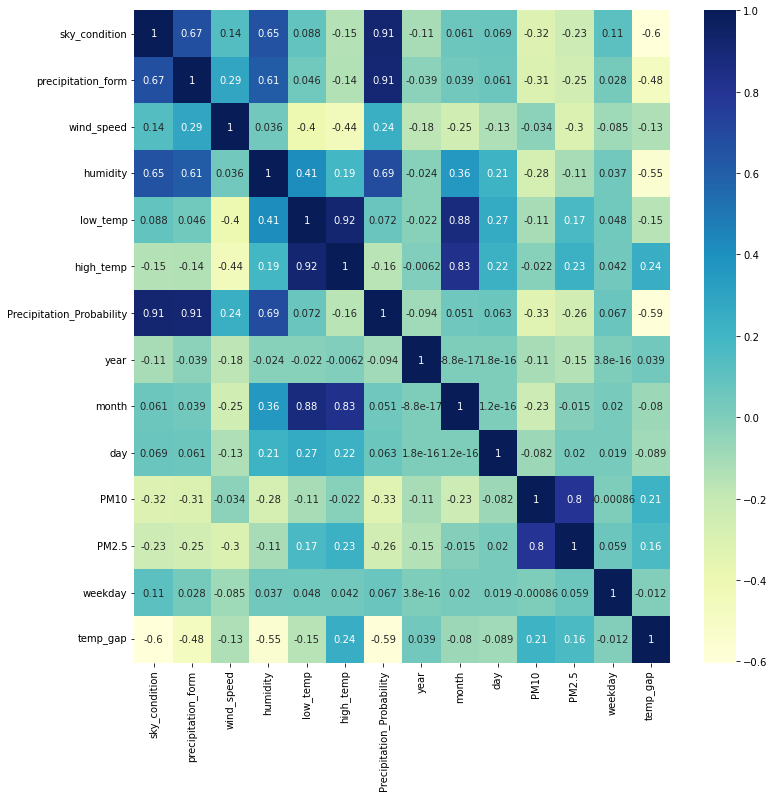

In [68]:
#heatmap

plt.figure(figsize=(12, 12))
sns.heatmap(X.corr(),annot=True, cmap='YlGnBu')
plt.show()